# Overview and Description of our Data

Our goal is to predict which sorghum cultivar is shown on the picture.
<br> To do it we have a dataset consists of 48,106 RGB images and 100 different sorghum cultivars.

# Libraries and Data Import

In [11]:
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from IPython.display import display, Image
# to increase no. of rows and column visibility in outputs
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [12]:
train = pd.read_csv("../input/sorghum-id-fgvc-9/train_cultivar_mapping.csv")
train.head()

,image,cultivar
0,2017-06-21__11-32-09-227.png,PI_152923
1,2017-06-27__10-36-57-694.png,PI_152923
2,2017-06-13__12-10-43-125.png,PI_152923
3,2017-06-03__12-37-57-818.png,PI_152923
4,2017-06-03__12-37-24-028.png,PI_152923


# Exploratory Data Analysis(EDA)

In [13]:
# Looking for train dataset informations
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22635 entries, 0 to 22634
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     22635 non-null  object
 1   cultivar  22635 non-null  object
dtypes: object(2)
memory usage: 353.8+ KB


In [14]:
train['cultivar'] = train['cultivar'].apply(lambda string: string.split(' '))
train

,image,cultivar
0,2017-06-21__11-32-09-227.png,[PI_152923]
1,2017-06-27__10-36-57-694.png,[PI_152923]
2,2017-06-13__12-10-43-125.png,[PI_152923]
3,2017-06-03__12-37-57-818.png,[PI_152923]
4,2017-06-03__12-37-24-028.png,[PI_152923]
...,...,...
22630,2017-06-04__13-32-11-825.png,[PI_152967]
22631,2017-06-04__13-33-43-417.png,[PI_152967]
22632,2017-06-20__12-19-56-066.png,[PI_152967]
22633,2017-06-09__12-51-11-655.png,[PI_152967]


First we convert the labels representation into one hot encoded format using MultilabelBinarizer from sklearn. Now we can see and plot the frequencies of each label.

Index(['PI_144134', 'PI_145619', 'PI_145626', 'PI_145633', 'PI_146890', 'PI_152591', 'PI_152651', 'PI_152694', 'PI_152727', 'PI_152728', 'PI_152730', 'PI_152733', 'PI_152751', 'PI_152771', 'PI_152816', 'PI_152828', 'PI_152860', 'PI_152862', 'PI_152923', 'PI_152961', 'PI_152965', 'PI_152966', 'PI_152967', 'PI_152971', 'PI_153877', 'PI_154750', 'PI_154844', 'PI_154846', 'PI_154944', 'PI_154987', 'PI_154988', 'PI_155516', 'PI_155760', 'PI_155885', 'PI_156178', 'PI_156217', 'PI_156268', 'PI_156326', 'PI_156330', 'PI_156393', 'PI_156463', 'PI_156487', 'PI_156871', 'PI_156890', 'PI_157030', 'PI_157035', 'PI_157804', 'PI_167093', 'PI_170787', 'PI_175919', 'PI_176766', 'PI_179749', 'PI_180348', 'PI_181080', 'PI_181083', 'PI_195754', 'PI_196049', 'PI_196583', 'PI_196586', 'PI_196598', 'PI_197542', 'PI_19770', 'PI_213900', 'PI_217691', 'PI_218112', 'PI_221548', 'PI_221651', 'PI_22913', 'PI_229841', 'PI_251672', 'PI_253986', 'PI_255239', 'PI_255744', 'PI_257599', 'PI_257600', 'PI_266927',
       

<AxesSubplot:>

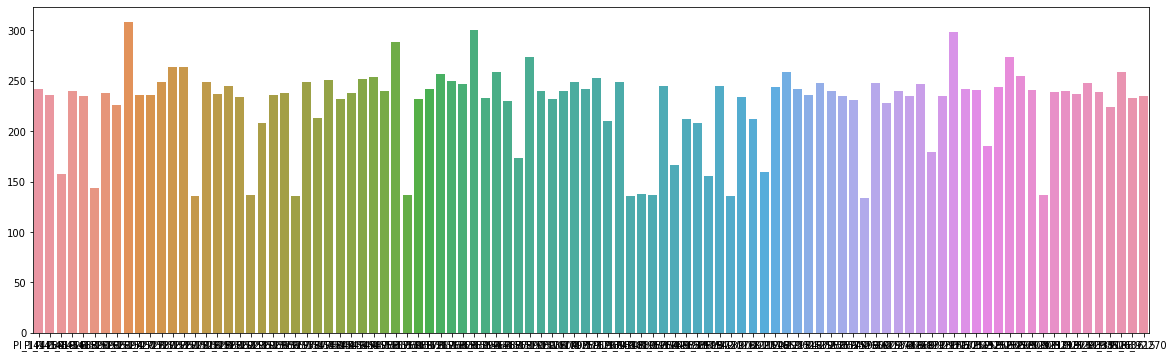

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer
s = list(train['cultivar'])
mlb = MultiLabelBinarizer()
trainx = pd.DataFrame(mlb.fit_transform(s), columns=mlb.classes_, index=train.index)
print(trainx.columns)
print(trainx.sum())

cultivars = list(trainx.sum().keys())
print(cultivars)
cultivar_counts = trainx.sum().values.tolist()

fig, ax = plt.subplots(1,1, figsize=(20,6))

sns.barplot(x= cultivars, y= cultivar_counts, ax=ax)

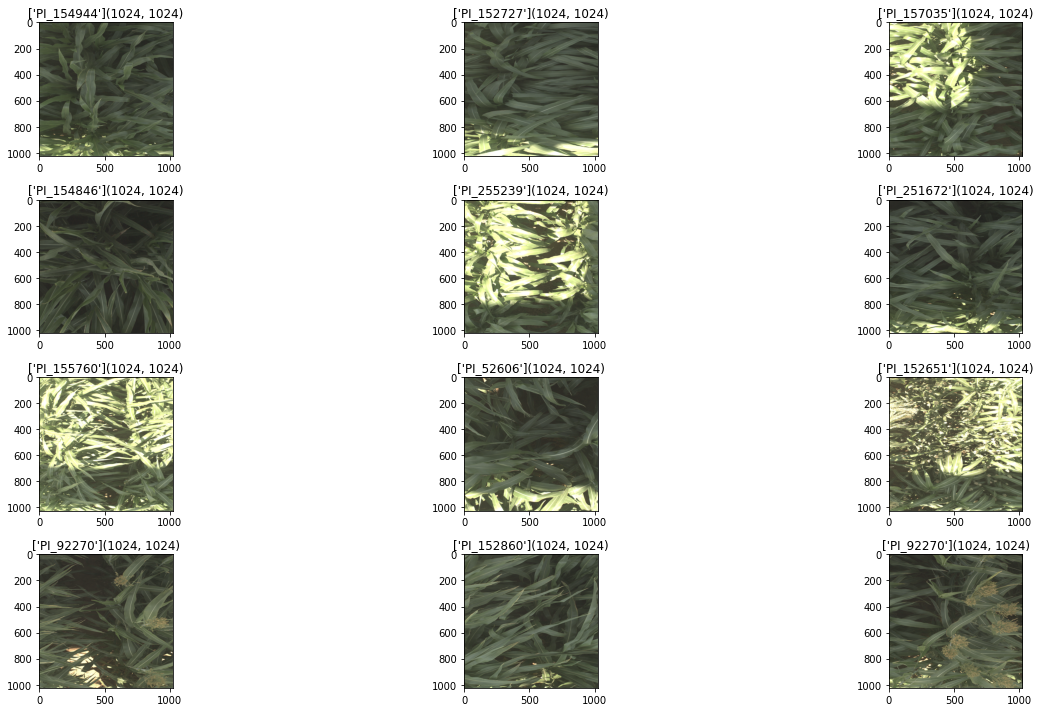

In [17]:
import PIL

# Let's take a look at some of the images
fig1 = plt.figure(figsize=(26,10))

for i in range(1, 13):
    
    rand =  random.randrange(1, 18000)
    sample = os.path.join('../input/sorghum-id-fgvc-9/train_images', train['image'][rand])
    
    img = PIL.Image.open(sample)
    
    ax = fig1.add_subplot(4,3,i)
    ax.imshow(img)
    
    title = f"{train['cultivar'][rand]}{img.size}"
    plt.title(title)
    
    fig1.tight_layout()

# Data size and Preprocessing
As we can see, our images sizes - (1024, 1024), Larger images are harder to process hence takes much longer to train the CNN. Downsampling all these 22635 images is also a time consuming task. This is why we are going to use the reduced images to JPEG for this dataset [DIY Resized Dataset (128x128 & 256x256 & 512x512](https://www.kaggle.com/gauravduttakiit/sorghum-cultivar-identification-256256)  by [Gaurav Dutta](https://www.kaggle.com/gauravduttakiit). He has already downsampled the images into size of 128, 256, 512.

In [18]:
rd_df = pd.read_csv("../input/sorghum-cultivar-identification-256256/train.csv")

In [19]:
rd_df['cultivar'] = rd_df['cultivar'].apply(lambda string: string.split(' '))
rd_df

,image,cultivar
0,2017-06-21__11-32-09-227.png,[PI_152923]
1,2017-06-27__10-36-57-694.png,[PI_152923]
2,2017-06-13__12-10-43-125.png,[PI_152923]
3,2017-06-03__12-37-57-818.png,[PI_152923]
4,2017-06-03__12-37-24-028.png,[PI_152923]
...,...,...
22630,2017-06-04__13-32-11-825.png,[PI_152967]
22631,2017-06-04__13-33-43-417.png,[PI_152967]
22632,2017-06-20__12-19-56-066.png,[PI_152967]
22633,2017-06-09__12-51-11-655.png,[PI_152967]


Index(['PI_144134', 'PI_145619', 'PI_145626', 'PI_145633', 'PI_146890', 'PI_152591', 'PI_152651', 'PI_152694', 'PI_152727', 'PI_152728', 'PI_152730', 'PI_152733', 'PI_152751', 'PI_152771', 'PI_152816', 'PI_152828', 'PI_152860', 'PI_152862', 'PI_152923', 'PI_152961', 'PI_152965', 'PI_152966', 'PI_152967', 'PI_152971', 'PI_153877', 'PI_154750', 'PI_154844', 'PI_154846', 'PI_154944', 'PI_154987', 'PI_154988', 'PI_155516', 'PI_155760', 'PI_155885', 'PI_156178', 'PI_156217', 'PI_156268', 'PI_156326', 'PI_156330', 'PI_156393', 'PI_156463', 'PI_156487', 'PI_156871', 'PI_156890', 'PI_157030', 'PI_157035', 'PI_157804', 'PI_167093', 'PI_170787', 'PI_175919', 'PI_176766', 'PI_179749', 'PI_180348', 'PI_181080', 'PI_181083', 'PI_195754', 'PI_196049', 'PI_196583', 'PI_196586', 'PI_196598', 'PI_197542', 'PI_19770', 'PI_213900', 'PI_217691', 'PI_218112', 'PI_221548', 'PI_221651', 'PI_22913', 'PI_229841', 'PI_251672', 'PI_253986', 'PI_255239', 'PI_255744', 'PI_257599', 'PI_257600', 'PI_266927',
       

<AxesSubplot:>

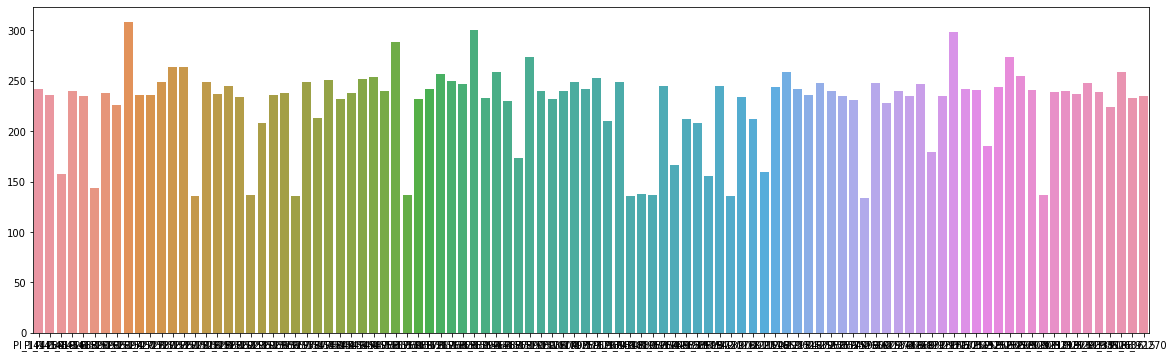

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer
s = list(rd_df['cultivar'])
mlb = MultiLabelBinarizer()
trainx = pd.DataFrame(mlb.fit_transform(s), columns=mlb.classes_, index=rd_df.index)
print(trainx.columns)
print(trainx.sum())

cultivars = list(trainx.sum().keys())
print(cultivars)
cultivar_counts = trainx.sum().values.tolist()

fig, ax = plt.subplots(1,1, figsize=(20,6))

sns.barplot(x= cultivars, y= cultivar_counts, ax=ax)

In [21]:
rd_df.head(10)

,image,cultivar
0,2017-06-21__11-32-09-227.png,[PI_152923]
1,2017-06-27__10-36-57-694.png,[PI_152923]
2,2017-06-13__12-10-43-125.png,[PI_152923]
3,2017-06-03__12-37-57-818.png,[PI_152923]
4,2017-06-03__12-37-24-028.png,[PI_152923]
5,2017-06-12__13-50-33-268.png,[PI_152923]
6,2017-06-29__10-35-21-402.png,[PI_152923]
7,2017-06-03__12-37-25-548.png,[PI_152923]
8,2017-06-23__14-57-18-758.png,[PI_152923]
9,2017-06-02__16-53-01-245.png,[PI_152923]


In [26]:
import PIL

# Let's take a look at some of the images
fig1 = plt.figure(figsize=(26,10))

for i in range(1, 13):
    
    rand =  random.randrange(1, 18000)
    sample = os.path.join("../input/sorghum-cultivar-identification-256256/train", rd_df['image'][rand])
    
    img = PIL.Image.open(sample)
    
    ax = fig1.add_subplot(4,3,i)
    ax.imshow(img)
    
    title = f"{rd_df['cultivar'][rand]}{img.size}"
    plt.title(title)
    
    fig1.tight_layout()

FileNotFoundError: [Errno 2] No such file or directory: '../input/sorghum-cultivar-identification-256256/train/2017-06-14__13-50-11-669.png'

<Figure size 1872x720 with 0 Axes>

In [24]:
# Lets take a look at some of the images

def show(n,di):
    if di=='train':
        path="../input/sorghum-cultivar-identification-256256/train"
        for i in range(n):
            files=os.listdir(path)
            d=random.choice(files)
            print("File Name with dir: ",path+'/'+d)
            display(Image(filename=path+'/'+d))
    else:
        path="../input/sorghum-cultivar-identification-256256/test"
        for i in range(n):
            files=os.listdir(path)
            d=random.choice(files)
            print("File Name with dir: ",path+'/'+d)
            display(Image(filename=path+'/'+d))



File Name with dir:  ../input/sorghum-cultivar-identification-256256/train/2017-06-09__13-15-10-12.png


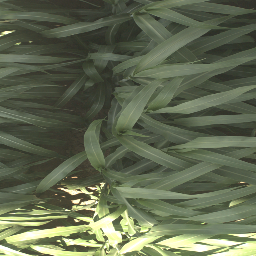

File Name with dir:  ../input/sorghum-cultivar-identification-256256/train/2017-06-03__12-43-31-07.png


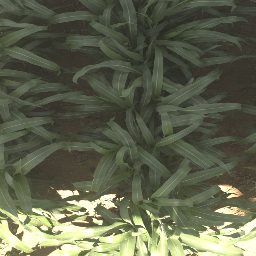

File Name with dir:  ../input/sorghum-cultivar-identification-256256/train/2017-06-22__13-09-01-74.png


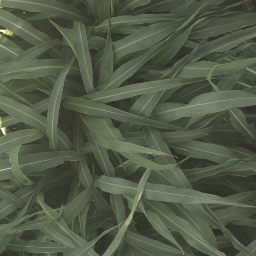

File Name with dir:  ../input/sorghum-cultivar-identification-256256/train/2017-06-28__11-47-11-07.png


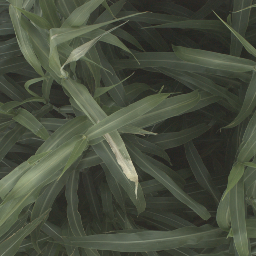

File Name with dir:  ../input/sorghum-cultivar-identification-256256/train/2017-06-03__13-13-13-21.png


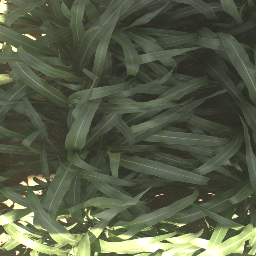

In [25]:
show(n=5,di='train')